In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10,5))
mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import os
import re

In [2]:
files = list()
for file in os.listdir('C:/Users/krven/Dropbox/College/Jupyter/Modern Lab/brownian/1micron'):
    if re.match(r".*\.tif", file):
        noext = os.path.splitext(file)[0]
        try:
            _, no_str = re.split("_", noext)
        except ValueError:
            _, _, no_str = re.split("_", noext)
        no = int(no_str)
        files.append((no, file))
    
files.sort(key=lambda x : x[0])

seq = 0
for no, file in files:
    frame = pims.as_grey(pims.TiffStack(os.path.join('C:/Users/krven/Dropbox/College/Jupyter/Modern Lab/brownian/1micron', file)))
    if seq == 0: frames = frame
    else: 
        frames = np.append(frames, frame, 0)
    # print(np.shape(frames))
    if np.shape(frames)[0] >  1000: break
    seq += 1
print(np.shape(frames))

(1002, 768, 1024)


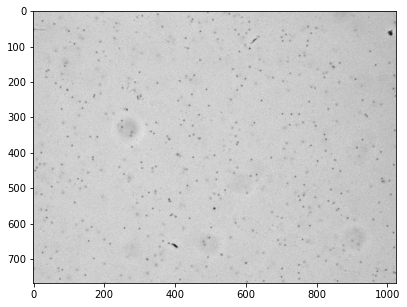

In [3]:
plt.imshow(frames[5])

In [4]:
f = tp.locate(frames[0], 11, invert=True)
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep
0,4.879896,88.992167,60.820677,2.375352,0.246461,3.970018,10310.0,-0.539201
1,5.317291,161.286988,89.087206,2.669896,0.132689,4.605221,10309.0,-0.536248
2,4.387560,417.976077,99.568054,2.540580,0.078844,4.764022,10209.0,-0.346477
3,6.185031,740.176715,76.383148,2.971801,0.258527,3.017214,10422.0,-1.407168
4,4.823741,840.859712,44.146601,3.028640,0.189186,2.540812,10751.0,0.377401


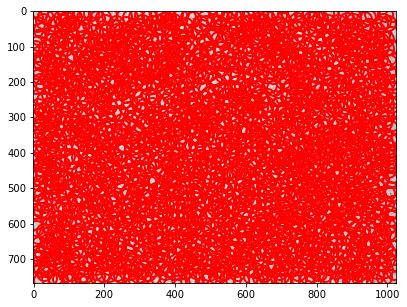

<AxesSubplot:>

In [5]:
tp.annotate(f, frames[0])

[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

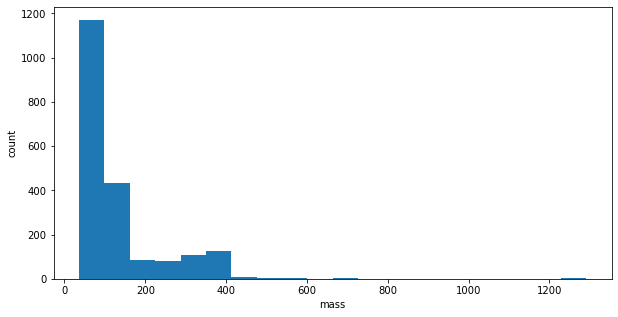

In [6]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
ax.set(xlabel='mass', ylabel='count')

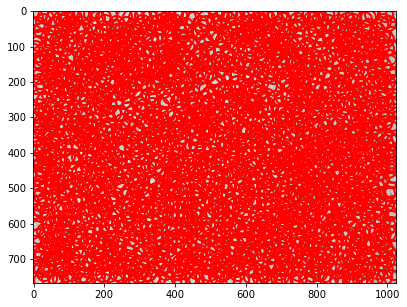

<AxesSubplot:>

In [7]:
f = tp.locate(frames[0], 11, invert=True, minmass=40)
tp.annotate(f, frames[0])

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

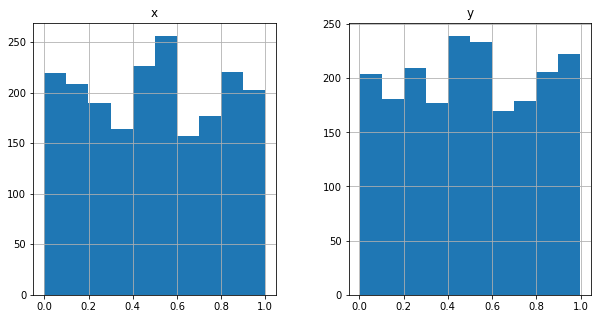

In [8]:
tp.subpx_bias(f)

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

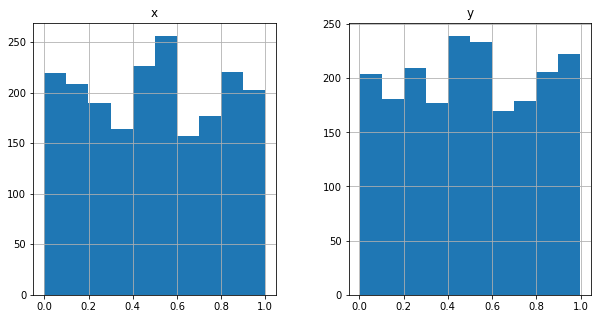

In [9]:
tp.subpx_bias(tp.locate(frames[0], 11, invert=True, minmass=40))

In [10]:
f = tp.batch(frames[:1000], 11, minmass=40, invert=True)

Frame 999: 1979 features


In [11]:
t = tp.link(f, 5, memory=3)
t.head()

Frame 999: 1979 trajectories present.


,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,4.879896,88.992167,60.820677,2.375352,0.246461,3.970018,10310.0,-0.539201,0,0
1354,514.403218,603.099548,315.854639,2.464632,0.103041,12.862859,10812.0,0.305554,0,1
1353,514.514377,388.485623,99.409253,2.672783,0.216609,5.558025,10279.0,-0.460569,0,2
1352,512.762000,997.500000,79.400362,3.024235,0.221232,3.334815,10693.0,0.486073,0,3
1351,513.123967,903.615702,76.859550,3.147214,0.461919,3.176014,10564.0,1.351868,0,4


In [12]:
t1 = tp.filter_stubs(t,25)
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 520473
After: 4723


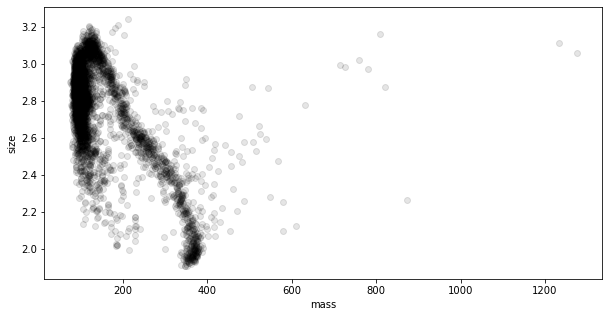

<Figure size 720x360 with 0 Axes>

In [31]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())
plt.savefig('masssize.png', format='png')

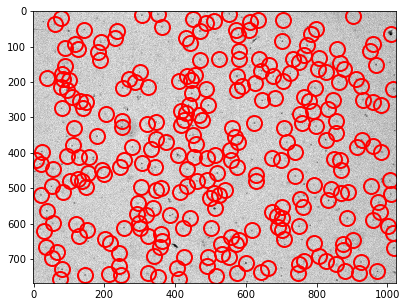

<AxesSubplot:>

In [35]:
t2 = t1[((t1['mass'] > 70) & (t1['size'] < 3.2) &
         (t1['ecc'] < 0.1))]
plt.figure()
tp.annotate(t2[t2['frame']==0], frames[0])

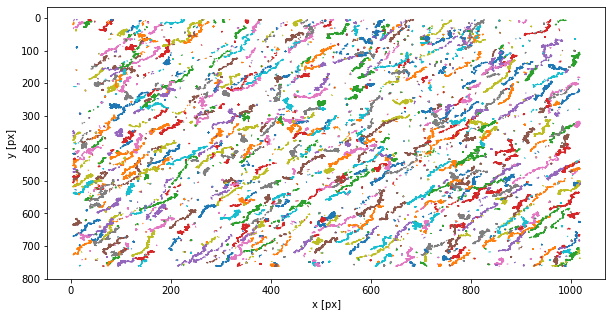

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [15]:
plt.figure()
tp.plot_traj(t2)

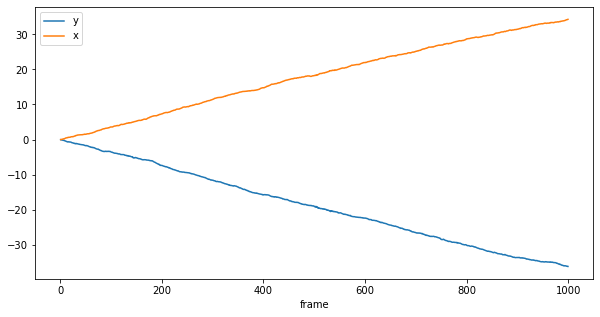

In [16]:
d = tp.compute_drift(t2)
d.plot()
plt.show()

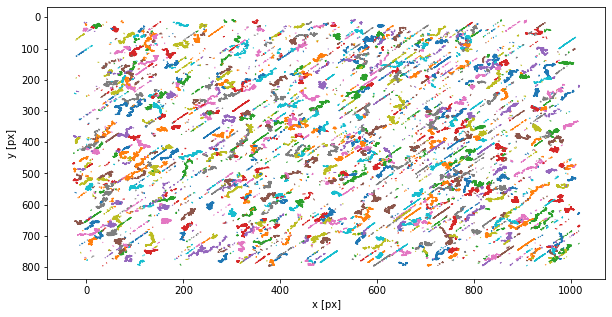

In [17]:
tm = tp.subtract_drift(t2.copy(), d)
ax = tp.plot_traj(tm)
plt.show()

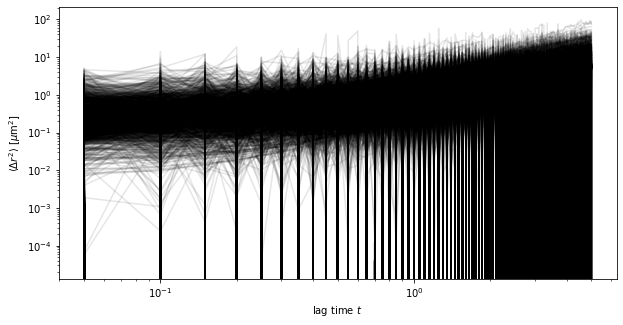

In [18]:
im = tp.imsd(tm, 475/1024, 20)
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

C:\Users\krven\anaconda3\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\krven\anaconda3\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


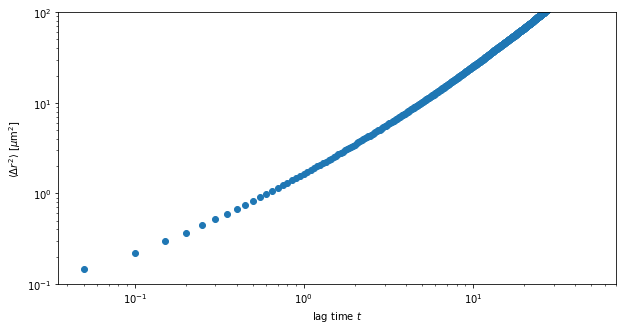

In [19]:
em = tp.emsd(tm, 475/1024, 20, max_lagtime=1000)
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-1, 1e2));

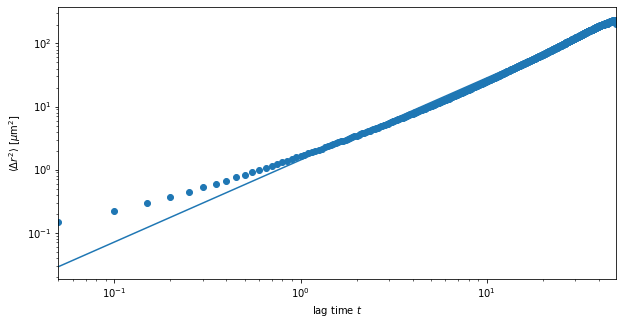

,n,A
msd,1.300464,1.419576


In [20]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)